# 1.Autoencoder

A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of Dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should Be able to do better using convolutional layers instead of Dense layers.

Build and fit a convolutional autoencoder for the CIFAR10 dataset. The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will uti- lize UpSampling2D to get the representation back to the original image size.

An example to guide your thinking can be found toward the bottom of this Post https://blog.keras.io/building-autoencoders-in-keras.html. DO NOT JUST COPY THIS CODE AND TURN IT IN. BE CREATIVE, COME UP WITH YOUR OWN VARIATION. After training your network, visualize some examples of input images and their decoded reconstruction.

In [48]:
from keras import layers
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as tfk
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense, Conv1D,Conv2D,GlobalMaxPooling1D, MaxPooling2D, UpSampling2D,Dropout,Flatten, Embedding, LSTM
from keras.models import Model,Sequential

In [49]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)  
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
input = Input(shape=(32, 32, 3)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [4]:
autoencoder = Model(input, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 32)       

In [6]:
model_result1 = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
391/391 [==============================] - 57s 147ms/step - loss: 0.5656 - val_loss: 0.5638
Epoch 2/20
391/391 [==============================] - 56s 144ms/step - loss: 0.5617 - val_loss: 0.5614
Epoch 3/20
391/391 [==============================] - 57s 146ms/step - loss: 0.5602 - val_loss: 0.5602
Epoch 4/20
391/391 [==============================] - 56s 142ms/step - loss: 0.5592 - val_loss: 0.5595
Epoch 5/20
391/391 [==============================] - 56s 142ms/step - loss: 0.5585 - val_loss: 0.5591
Epoch 6/20
391/391 [==============================] - 55s 140ms/step - loss: 0.5579 - val_loss: 0.5584
Epoch 7/20
391/391 [==============================] - 55s 140ms/step - loss: 0.5575 - val_loss: 0.5582
Epoch 8/20
391/391 [==============================] - 55s 141ms/step - loss: 0.5571 - val_loss: 0.5577
Epoch 9/20
391/391 [==============================] - 55s 141ms/step - loss: 0.5569 - val_loss: 0.5574
Epoch 10/20
391/391 [==============================] - 55s 142ms/step - l

In [7]:
print("The loss is :  ",model_result1.history['loss'])
print("The accuracy is :  ",model_result1.history['val_loss'])

The loss is :   [0.5655568242073059, 0.5616645812988281, 0.5602093935012817, 0.5591699481010437, 0.558472752571106, 0.5579089522361755, 0.5575272440910339, 0.5571225881576538, 0.5568670630455017, 0.556593120098114, 0.5563880205154419, 0.5562069416046143, 0.5560544729232788, 0.5558765530586243, 0.5556660294532776, 0.5555464625358582, 0.5553864240646362, 0.5552476644515991, 0.5551279187202454, 0.5550026297569275]
The accuracy is :   [0.5638160109519958, 0.561397135257721, 0.560210645198822, 0.5594581961631775, 0.5590621829032898, 0.5583853721618652, 0.5582191348075867, 0.5576880574226379, 0.5573710203170776, 0.5574222803115845, 0.5571625828742981, 0.5570698976516724, 0.5570743680000305, 0.5567925572395325, 0.556444525718689, 0.556148886680603, 0.5561655163764954, 0.5559537410736084, 0.5557225346565247, 0.5556700825691223]


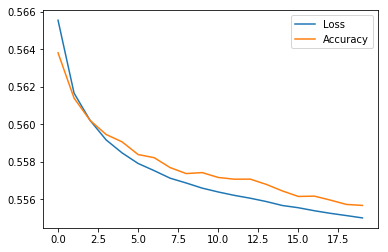

In [8]:
plt.plot(model_result1.history['loss'])
plt.plot(model_result1.history['val_loss'])
plt.legend(labels=['Loss','Accuracy'])

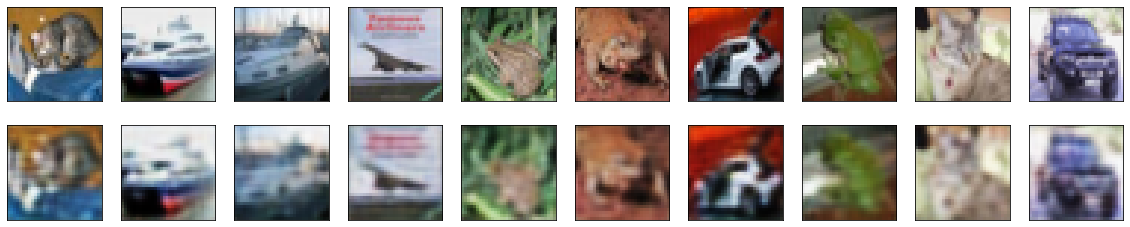

In [9]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder.predict(x_test)[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# 2. Image Classification

## 2.1 Deep CNN

Build a deep CNN to classify the images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth.Train your network end-to-end. Report on your model’s performance on the training set and test set.

In [71]:
import keras
from keras import layers

In [72]:
layers= tfk.layers

In [79]:
model1 = tfk.Sequential()


In [80]:
model1.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(32,32,3))) 
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)             

In [81]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)             

In [82]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
label_train = to_categorical(y_train)
label_test = to_categorical(y_test)

In [84]:
model_result2 = model1.fit(x_train,
                           label_train,
                           steps_per_epoch=100,
                           epochs=20,
                           batch_size=128,
                           validation_data=(x_test,label_test))

Epoch 1/20
100/100 [==============================] - 10s 100ms/step - loss: 2.1672 - accuracy: 0.1863 - val_loss: 1.9577 - val_accuracy: 0.3108
Epoch 2/20
100/100 [==============================] - 10s 96ms/step - loss: 1.9258 - accuracy: 0.2980 - val_loss: 1.7728 - val_accuracy: 0.3875
Epoch 3/20
100/100 [==============================] - 10s 97ms/step - loss: 1.8047 - accuracy: 0.3460 - val_loss: 1.6164 - val_accuracy: 0.4415
Epoch 4/20
100/100 [==============================] - 10s 96ms/step - loss: 1.7078 - accuracy: 0.3832 - val_loss: 1.5603 - val_accuracy: 0.4518
Epoch 5/20
100/100 [==============================] - 10s 96ms/step - loss: 1.6446 - accuracy: 0.4086 - val_loss: 1.4548 - val_accuracy: 0.4853
Epoch 6/20
100/100 [==============================] - 10s 95ms/step - loss: 1.6018 - accuracy: 0.4227 - val_loss: 1.4273 - val_accuracy: 0.5021
Epoch 7/20
100/100 [==============================] - 10s 101ms/step - loss: 1.5664 - accuracy: 0.4423 - val_loss: 1.3649 - val_accurac

The loss is :   [2.1671526432037354, 1.9258127212524414, 1.804694414138794, 1.7077980041503906, 1.6445813179016113, 1.6017779111862183, 1.5664066076278687, 1.5206741094589233, 1.492820143699646, 1.4650534391403198, 1.4469987154006958, 1.4341144561767578, 1.400124192237854, 1.389763593673706, 1.3787970542907715, 1.3509610891342163, 1.3313870429992676, 1.3239494562149048, 1.3337736129760742, 1.3057538270950317]
The accuracy is :   [1.9577137231826782, 1.7727506160736084, 1.6164028644561768, 1.5603094100952148, 1.4547661542892456, 1.4272838830947876, 1.3648912906646729, 1.4100184440612793, 1.3242292404174805, 1.2886085510253906, 1.3644787073135376, 1.2380821704864502, 1.2867562770843506, 1.2373065948486328, 1.2203269004821777, 1.1711403131484985, 1.1759033203125, 1.1527067422866821, 1.1773781776428223, 1.150208830833435]


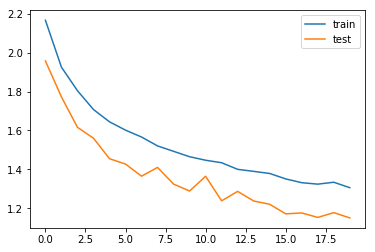

In [85]:
print("The loss is :  ",model_result2.history['loss'])
print("The accuracy is :  ",model_result2.history['val_loss'])

plt.plot(model_result2.history['loss'])
plt.plot(model_result2.history['val_loss'])
plt.legend(labels=['train','test'])

In this model, the kernel size = (3,3), the strides=1, and the padding =valid.

# 2.2 Transfer learning

Repeat the same task, but this time utilize a pre-trained network for the major- ity of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on the training set and test set.

In [21]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [22]:
model2 = tfk.Sequential()

In [23]:
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(784, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [24]:
conv_base.trainable = False

In [50]:
len(model2.trainable_weights)

4

In [53]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model_result3 = model2.fit(x_train, label_train, 
                           epochs=5, 
                           batch_size=64,
                           validation_data=(x_test,label_test))

Epoch 1/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.6446 - accuracy: 0.4215 - val_loss: 1.3492 - val_accuracy: 0.5309
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4452 - accuracy: 0.4997 - val_loss: 1.2980 - val_accuracy: 0.5505
Epoch 3/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4037 - accuracy: 0.5205 - val_loss: 1.2757 - val_accuracy: 0.5644
Epoch 4/5
1563/1563 [==============================] - 149s 96ms/step - loss: 1.3877 - accuracy: 0.5295 - val_loss: 1.2864 - val_accuracy: 0.5573
Epoch 5/5
1563/1563 [==============================] - 152s 98ms/step - loss: 1.3882 - accuracy: 0.5335 - val_loss: 1.2787 - val_accuracy: 0.5615


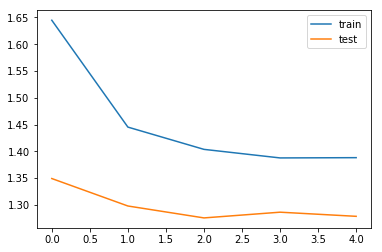

In [55]:
plt.plot(model_result3.history['loss'])
plt.plot(model_result3.history['val_loss'])
plt.legend(labels=['train','test'])

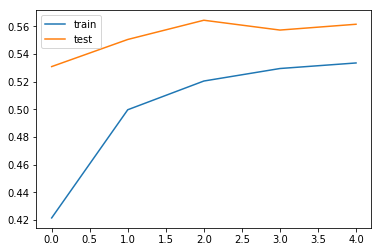

In [56]:
plt.plot(model_result3.history['accuracy'])
plt.plot(model_result3.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3. Text Classification

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and dis- crete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language.

Background. In this problem, we will build models that read text segments (messages) and identify whether they are SPAM or HAM.

Wikipedia describes SPAM as “the use of electronic messaging systems to send unsolicited bulk messages, especially advertising, indiscriminately.”

The term ‘HAM’ was originally coined by SpamBayes sometime around 2001 and is currently defined and understood to be “E-mail that is generally desired and isn’t considered SPAM.” Dataset. The dataset consists of ∼ 5500 messages along with binary la- bels(SPAM or HAM) and is already preprocessed. So basically each sample is like [MESSAGE, LABEL].

In [57]:
spam = pd.read_csv('SPAM_detection.csv')

In [63]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [60]:
x = spam['Message']
y = spam['category_val']
x=np.asarray(x)
y=np.asarray(y)

In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [65]:
x=np.asarray(x)
y=np.asarray(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=88)

In [66]:
tok_x_train=pad_sequences(tokenizer.texts_to_sequences(x_train),padding='post')
tok_x_test=pad_sequences(tokenizer.texts_to_sequences(x_test),padding='post')

In [69]:
tok_x_train2=tok_x_train[np.arange(tok_x_train.shape[0])]
tok_x_test2=tok_x_test[np.arange(tok_x_test.shape[0])]
tok_y_train2=y_train[np.arange(y_train.shape[0])]
tok_y_test2=y_test[np.arange(y_test.shape[0])]

In [70]:
model3=tfk.Sequential()

In [74]:
model3.add(layers.Embedding(len(tokenizer.word_index)+1, 16, input_length=128))
model3.add(layers.LSTM(64,return_sequences=True))
model3.add(layers.GlobalMaxPool1D())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(64,activation="relu"))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1,activation="sigmoid"))

In [75]:
model3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 16)           144080    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128, 128)          74240     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [77]:
model_result4 = model3.fit(tok_x_train2,
                        tok_y_train2,
                        validation_data=(tok_x_test2,tok_y_test2),
                        epochs=10,steps_per_epoch=100,batch_size=64)

Epoch 1/10
10/10 [==============================] - 1s 140ms/step - loss: 0.1238 - accuracy: 0.9719 - val_loss: 0.3414 - val_accuracy: 0.8852
Epoch 2/10
10/10 [==============================] - 1s 136ms/step - loss: 0.0991 - accuracy: 0.9719 - val_loss: 0.1155 - val_accuracy: 0.9641
Epoch 3/10
10/10 [==============================] - 1s 135ms/step - loss: 0.1208 - accuracy: 0.9625 - val_loss: 0.2917 - val_accuracy: 0.8594
Epoch 4/10
10/10 [==============================] - 1s 139ms/step - loss: 0.1780 - accuracy: 0.9281 - val_loss: 0.1199 - val_accuracy: 0.9504
Epoch 5/10
10/10 [==============================] - 1s 139ms/step - loss: 0.0452 - accuracy: 0.9906 - val_loss: 0.1092 - val_accuracy: 0.9767
Epoch 6/10
10/10 [==============================] - 1s 140ms/step - loss: 0.0567 - accuracy: 0.9906 - val_loss: 0.0916 - val_accuracy: 0.9773
Epoch 7/10
10/10 [==============================] - 1s 136ms/step - loss: 0.1315 - accuracy: 0.9594 - val_loss: 0.1749 - val_accuracy: 0.9228
Epoch 

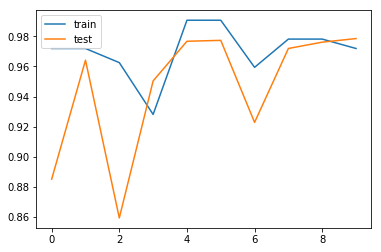

In [78]:
plt.plot(model_result4.history['accuracy'])
plt.plot(model_result4.history['val_accuracy'])
plt.legend(labels=['train','test'])

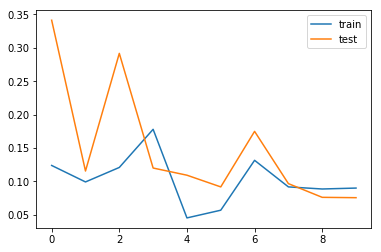

In [79]:
plt.plot(model_result4.history['loss'])
plt.plot(model_result4.history['val_loss'])
plt.legend(labels=['train','test'])